## OneSample

### Import libraries and load data

In [27]:
# data
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../../data/simple_data.csv', delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]
N = len(x_data)

print(f'areas: {x_data}')
print(f'prices: {y_data}')
print(f'data_size: {N}')

areas: [6.7 4.6 3.5 5.5]
prices: [9.1 5.9 4.6 6.7]
data_size: 4


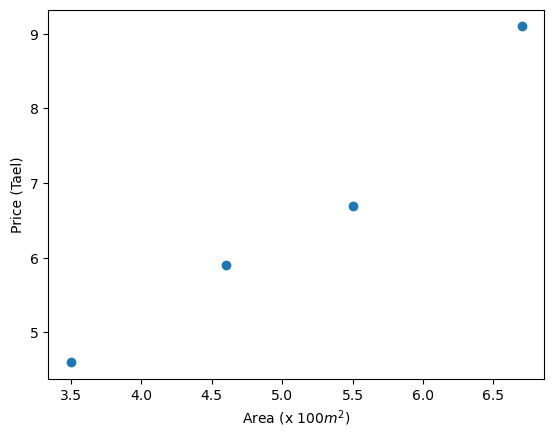

In [28]:
plt.scatter(x_data, y_data)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.show()


### Training function

[Huber Loss Function in Machine Learning](https://www.geeksforgeeks.org/machine-learning/huber-loss-function-in-machine-learning/)

In [43]:
def predict(x, w, b):
    return w * x + b

def compute_loss(y_hat, y, delta=5):
    error = y_hat - y
    if abs(error) < delta:
        loss =  0.5 * error ** 2 #?
    else:
        loss = delta * (abs(error) - 0.5 * delta)
    return loss

def compute_gradient_sr(x, y, y_hat):
    dw = x * (y_hat - y)
    db = (y_hat - y)
    return (dw, db)

def compute_gradient_ar(x, y, y_hat, delta=5):
    dw = delta * x * (y_hat - y) / abs(y_hat - y)
    db = delta * (y_hat - y) / abs(y_hat - y)
    return (dw, db)

def compute_gradient(x, y, y_hat, delta = 5):
    error = y_hat - y
    if abs(error) < delta:
        dw, db = compute_gradient_sr(y_hat, y, x)
    else:
        dw, db = compute_gradient_ar(y_hat, y, x, delta)
    return dw, db

def update_gradient(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return (w, b)

### Training process

In [45]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameters
epoch_max = 10
losses = [] # for debug

for epoch in range(epoch_max):
    for i in range(N):
        # get a sample
        x = x_data[i]
        y = y_data[i]

        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = compute_loss(y_hat, y)
        losses.append(loss)
        print(loss)

        # compute gradient
        (dw, db) = compute_gradient(y_hat, y, x)

        # update weights
        (w, b) = update_gradient(w, b, dw, db, lr)

print(w, b)

44.19
7.281875925251284
2.7034647567167442
3.8199153445238667
5.464643606697658
0.3152608476389037
0.131778788535219
0.05650525558665094
0.8235815729466477
0.0005613689593114371
0.0016678691792517512
0.037857825094625285
0.2994020343667349
0.01242782461801593
0.001591420586359091
0.09209781390951825
0.20809073808790027
0.021110186125103368
0.0035809697917458714
0.10954119758803092
0.1874622571780857
0.02358964696143582
0.004158701682099048
0.11422234349967456
0.18219227190197868
0.024168206194115457
0.00426190860053864
0.11546790194262008
0.18063268769824534
0.02424765695918969
0.004239283681961793
0.11583413064009351
0.1799974048801689
0.02420058377977747
0.004185208481493258
0.11597792827936831
0.1795947492714069
0.024121900778361238
0.004123722484369678
0.11606555628348748
1.2250097420767778 0.293683827658028


### Loss visualization

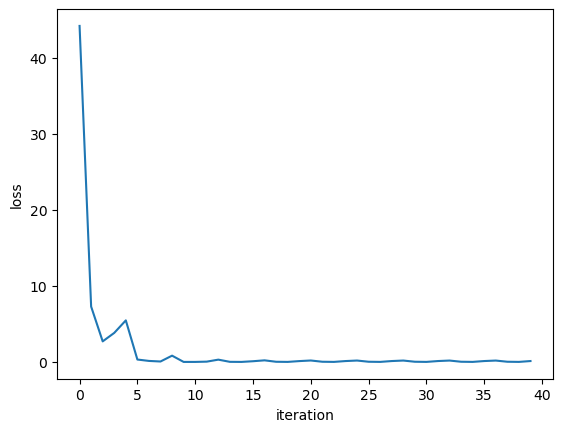

In [46]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

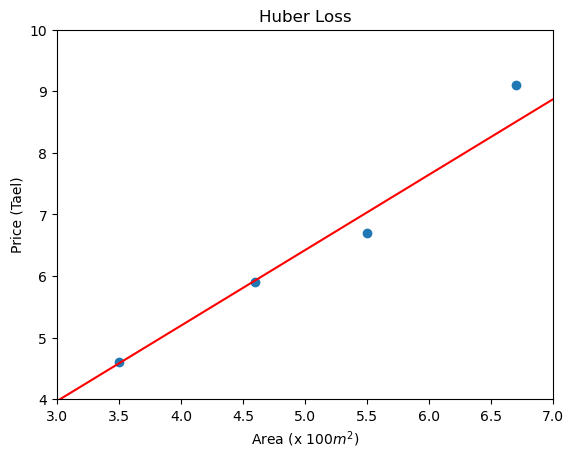

In [15]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')


areas  = data[:, 0]
prices = data[:, 1]
plt.scatter(areas, prices)

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Huber Loss')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

## NSample

### Import libraries and load data

### Training function
Using the same function as `One Sample` section

In [38]:
print("areas: ", x_data)
print("prices: ", y_data)
print("data size: ", N)

areas:  [6.7 4.6 3.5 5.5]
prices:  [9.1 5.9 4.6 6.7]
data size:  4


In [81]:
def predict(x, w, b):
    return w * x + b

def compute_loss(y_hat, y, delta=5):
    error = y_hat - y
    if abs(error) < delta:
        loss =  0.5 * error ** 2 #?
    else:
        loss = delta * (abs(error) - 0.5 * delta)
    return loss

def compute_gradient_sr(x, y, y_hat):
    dw = x * (y_hat - y)
    db = (y_hat - y)
    return (dw, db)

def compute_gradient_ar(x, y, y_hat, delta=5):
    dw = delta * x * (y_hat - y) / abs(y_hat - y)
    db = delta * (y_hat - y) / abs(y_hat - y)
    return (dw, db)

def compute_gradient(x, y, y_hat, delta = 5):
    error = y_hat - y
    if abs(error) < delta:
        dw, db = compute_gradient_sr(x, y, y_hat)
    else:
        dw, db = compute_gradient_ar(x, y, y_hat, delta)
    return dw, db

def update_gradient(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return (w, b)

### Training process

In [82]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameters
epoch_max = 30

losses = [] # for debug

for epoch in range(epoch_max):
    # for each epoch
    (dw_total, db_total) = (0, 0)
    epoch_losses = []
    for i in range(N):
        # get a sample
        x = x_data[i]
        y = y_data[i]

        # predict y_hat
        y_hat = predict(x, w, b)

        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = compute_loss(y_hat, y)
        epoch_losses.append(loss)
        print(loss)

        # compute gradient
        (dw, db) = compute_gradient(x, y, y_hat)

        # accumulate
        dw_total = dw_total + dw
        db_total = db_total + db

    losses.append(np.sum(epoch_losses) / N)
    # update weights
    (w, b) = update_gradient(w, b, (dw_total/N), (db_total/N), lr)
print(w, b)

44.19
24.62
16.25
30.150000000000006
35.439375
18.53375
11.577070507812499
22.921875000000004
26.746245703124995
12.487714738787123
7.527128765793532
15.741369140625
18.33890384698242
7.327975982269684
4.43740613410818
9.071718463858714
11.065982863375627
3.951009943833718
2.410017674681305
4.654561850499822
6.188926336225683
1.973321831226049
1.2176415382689911
2.1457385119344763
3.5514922265271647
0.9712882712835224
0.6094007952515682
0.9346337856176686
2.104646438085565
0.46797683178861865
0.3008695033762996
0.3703845786704016
1.296793752532346
0.2183874907967491
0.14562993443816102
0.12321667967005943
0.8361389583044854
0.09699934803869713
0.06844411938760807
0.027488722651386216
0.567077481367497
0.03974705545245596
0.03074805227165316
0.0010625348970330624
0.4057561600969312
0.01410808715231702
0.012845884835131499
0.003993291768507273
0.30637797710244263
0.003700810118753078
0.004729407129768926
0.01744464971237562
0.24350989052539995
0.00036772680557717915
0.0013501871815535405

### Loss visualization

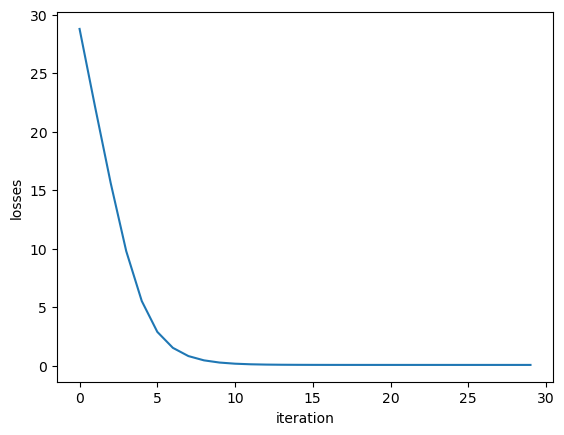

In [83]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

Text(0.5, 1.0, 'Huber Loss (Batch)')

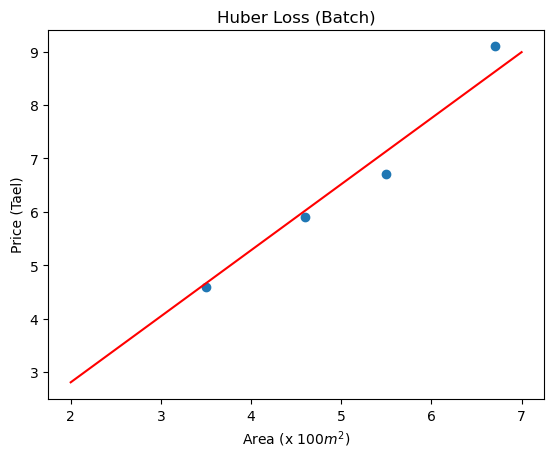

In [85]:
x_data = range(2, 8)
y_data = [x * w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

areas  = data[:, 0]
prices = data[:, 1]
plt.scatter(areas, prices)
#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Huber Loss (Batch)')

Conclusion: Train with batch is smoothier than 1 samples